In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ptitprince import RainCloud
from Levenshtein import distance

In [2]:
EXP_PATH = Path.cwd()
ROOT_DIR = EXP_PATH.parents[2]
exp_name = EXP_PATH.name
RAW_DATA_DIR = ROOT_DIR / 'data' / 'original_data'
DATA_DIR = ROOT_DIR / 'data' / 'kaggle_dataset' / 'irohith_tfrecords'
SAVE_DIR = ROOT_DIR / 'outputs' / exp_name
SAVE_DIR.mkdir(parents=True, exist_ok=True)

# check oof

In [40]:
oof_0_df = pd.read_csv(SAVE_DIR / 'fold0' / 'oof_df.csv')
oof_1_df = pd.read_csv(SAVE_DIR / 'fold1' / 'oof_df.csv')
oof_2_df = pd.read_csv(SAVE_DIR / 'fold2' / 'oof_df.csv')
oof_3_df = pd.read_csv(SAVE_DIR / 'fold3' / 'oof_df.csv')

oof_df = pd.concat([oof_0_df, oof_1_df, oof_2_df, oof_3_df], axis=0)
oof_df['pred'] = oof_df['pred'].fillna('').astype(str)
oof_df['len_phrase'] = oof_df['phrase'].apply(lambda x: len(x))
oof_df['len_pred'] = oof_df['pred'].apply(lambda x: len(x))

train_df = pd.read_csv(ROOT_DIR / 'data' / 'created_data' / 'train2.csv')
oof_df = oof_df.merge(train_df[['sequence_id', 'file_id', 'n_frames', 'dominant_hand', 'n_frames_hand']], on='sequence_id', how='left')

### scoreの分布

<Axes: ylabel='Frequency'>

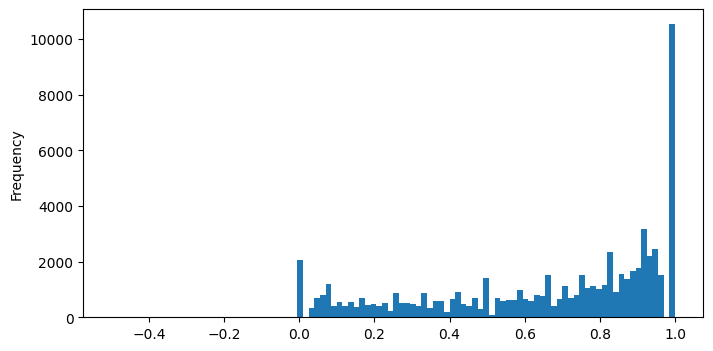

In [41]:
oof_df['score'].plot(kind='hist', bins=100, figsize=(8, 4))

In [42]:
oof_df['score'].describe()

count    67275.000000
mean         0.661260
std          0.312581
min         -0.500000
25%          0.428571
50%          0.761905
75%          0.923077
max          1.000000
Name: score, dtype: float64

<Axes: xlabel='len_phrase'>

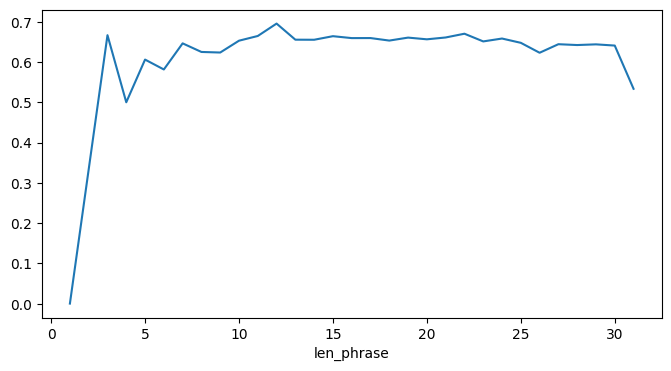

In [43]:
# targetの長さとscoreの関係
oof_df.groupby('len_phrase')['score'].mean().plot(figsize=(8, 4))

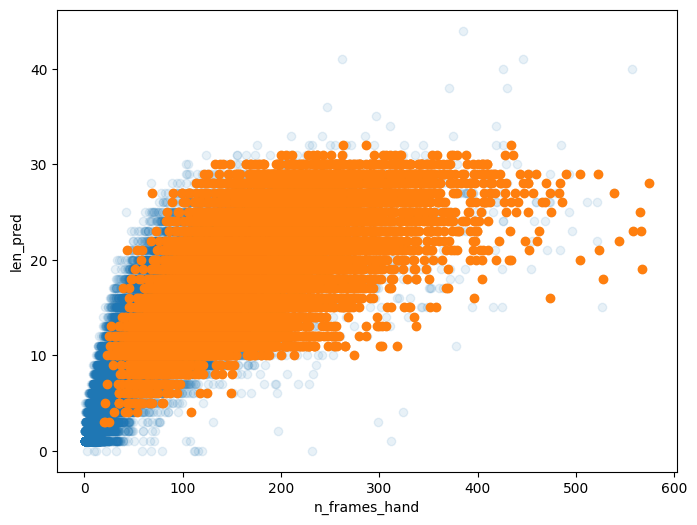

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(oof_df['n_frames_hand'], oof_df['len_pred'], alpha=0.1)
oof_low_df = oof_df.query('score > 0.9')
ax.scatter(oof_low_df['n_frames_hand'], oof_low_df['len_pred'], alpha=1)
ax.set_xlabel('n_frames_hand')
ax.set_ylabel('len_pred')
plt.show()

In [45]:
score = []
for pred, target in oof_df[['pred', 'phrase']].values:
    N = len(target)
    D = distance(pred, target)
    score.append((N - D) / N)
np.mean(score)

0.6611406703671778

In [46]:
oof_df['limit_pred'] = (oof_df['n_frames_hand'] // 3).astype(int)

In [47]:
oof_df

,sequence_id,phrase,pred,score,fold,len_phrase,len_pred,file_id,n_frames,dominant_hand,n_frames_hand,limit_pred
0,1494438637,gladys guzman,gadys gzan,0.769231,0,13,10,296317215,107,right,53,17
1,1494454903,8780 old 13th,8780 old 3h,0.846154,0,13,11,296317215,98,right,47,15
2,1494472407,+62-879-37-82,,0.000000,0,13,1,296317215,185,left,39,13
3,1494503729,www.china-ycyb.com/arduinoprof,www.cia-ycb.com/arduinopro,0.866667,0,30,26,296317215,241,left,191,63
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0,22,22,296317215,133,right,108,36
...,...,...,...,...,...,...,...,...,...,...,...,...
67282,1399691845,www.kmi-foods.nl/week,wwkmi-fod.nl/week,0.809524,3,21,17,2036580525,130,left,75,25
67283,1399698197,www.hayano.co.jp,aci,0.125000,3,16,3,2036580525,52,right,6,2
67284,1399701872,anthropology/1the9fanart,anthropology/1hefanar,0.875000,3,24,21,2036580525,235,right,213,71
67285,1399765965,ericka tran,eia tran,0.727273,3,11,8,2036580525,67,right,42,14


In [48]:
oof_df['pred_clip'] = oof_df.apply(lambda x: x['pred'][:x['limit_pred']], axis=1)

In [49]:
score = []
for pred, target in oof_df[['pred_clip', 'phrase']].values:
    N = len(target)
    D = distance(pred, target)
    score.append((N - D) / N)
np.mean(score)

0.6526952207246846

In [52]:
# oof_0_df = pd.read_csv(SAVE_DIR / 'fold0' / 'oof_df.csv')
# oof_1_df = pd.read_csv(SAVE_DIR / 'fold1' / 'oof_df.csv')
# oof_2_df = pd.read_csv(SAVE_DIR / 'fold2' / 'oof_df.csv')
# oof_3_df = pd.read_csv(SAVE_DIR / 'fold3' / 'oof_df.csv')

# oof_df = pd.concat([oof_0_df, oof_1_df, oof_2_df, oof_3_df], axis=0)

In [53]:
oof_df

,sequence_id,phrase,pred,score,fold,len_phrase,len_pred,file_id,n_frames,dominant_hand,n_frames_hand,limit_pred,pred_clip
0,1494438637,gladys guzman,gadys gzan,0.769231,0,13,10,296317215,107,right,53,17,gadys gzan
1,1494454903,8780 old 13th,8780 old 3h,0.846154,0,13,11,296317215,98,right,47,15,8780 old 3h
2,1494472407,+62-879-37-82,,0.000000,0,13,1,296317215,185,left,39,13,
3,1494503729,www.china-ycyb.com/arduinoprof,www.cia-ycb.com/arduinopro,0.866667,0,30,26,296317215,241,left,191,63,www.cia-ycb.com/arduinopro
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0,22,22,296317215,133,right,108,36,7642 south beulah road
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67282,1399691845,www.kmi-foods.nl/week,wwkmi-fod.nl/week,0.809524,3,21,17,2036580525,130,left,75,25,wwkmi-fod.nl/week
67283,1399698197,www.hayano.co.jp,aci,0.125000,3,16,3,2036580525,52,right,6,2,ac
67284,1399701872,anthropology/1the9fanart,anthropology/1hefanar,0.875000,3,24,21,2036580525,235,right,213,71,anthropology/1hefanar
67285,1399765965,ericka tran,eia tran,0.727273,3,11,8,2036580525,67,right,42,14,eia tran


In [87]:
probing_df = oof_df.query('(len_phrase - len_pred) <= 4 and score > 0.67')

In [89]:
probing_df.to_csv('/Users/nakagawaayato/compe/kaggle/asl2/outputs/exp0007/probing_exp7.csv', index=False)

# check score

In [80]:
valid_result_fold0_df = pd.read_csv(SAVE_DIR / 'fold0' / 'valid_result.csv').fillna('').astype(str)
valid_result_fold1_df = pd.read_csv(SAVE_DIR / 'fold1' / 'valid_result.csv').fillna('').astype(str)
valid_result_fold2_df = pd.read_csv(SAVE_DIR / 'fold2' / 'valid_result.csv').fillna('').astype(str)
valid_result_fold3_df = pd.read_csv(SAVE_DIR / 'fold3' / 'valid_result.csv').fillna('').astype(str)
valid_result_df = pd.concat([
    valid_result_fold0_df,
    valid_result_fold1_df,
    valid_result_fold2_df,
    valid_result_fold3_df,
], axis=0).reset_index(drop=True)

In [81]:
valid_result_df

,target,pred_epoch0,pred_epoch1,pred_epoch2,pred_epoch3,pred_epoch4,pred_epoch5,pred_epoch6,pred_epoch7,pred_epoch8,...,pred_epoch11,pred_epoch12,pred_epoch13,pred_epoch14,pred_epoch15,pred_epoch16,pred_epoch17,pred_epoch18,pred_epoch19,pred_epoch20
0,gladys guzman,,adysa,gadysga,gadisa,adisa,gadysga,gadisan,gadysa,adyszan,...,gadysgan,gadys gzan,gadyszan,gadys gzan,gadys qgzan,gadys qgzan,gadys gan,gadys gan,gadys gzan,NaN
1,8780 old 13th,,8780l3,8780ld3,878ld3 h,8783,8783h,878l3h,878d3h,8780 l 3h,...,8780 ol 3h,8780 old 3h,8780 old 3h,8780 old 3h,8780 ol d 3h,8780 old 3h,8780 old 3h,8780 old 3h,8780 old 3h,NaN
2,www.china-ycyb.com/arduinoprof,,w.ciycbom/rdiopo,ww.miycibcom/oarduiopuro,w.i.ycbcom/arduinopro,w.ci-ycbcom/arduinopro,w.chiycbcm/aruiopro,w.ci-ycbcm/arduinopro,ww.chi-ycbom/arduinopro,.chi-ycb.om/arduinopro,...,www.i-ycbom/sarduinopro,ww.chi-ycb.com/arduinopro,ww.cmi-ycb.com/arduinopro,www.ci-ycyb.com/arduinopro,www.cmi-ycb.com/arduinopro,ww.ci-ycb.com/arduinopro,www.ci-ycb.com/arduinopro,www.cia-ycb.com/arduinopro,www.cia-ycb.com/arduinopro,NaN
3,7642 south beulah road,,7642sorthbberlahro,764 2southbeulahro,7642 esorthbbeulahrod,7642 sorth berlahro,7642 sorth berlh ro,7642 sorth beulho,7642 sourth berlhrod,7642 sorth beulah rod,...,7642 south beulh rod,7642 south beulh road,7642 south beulah rod,7642 south beulth road,7642 south beulh road,7642 south beulah road,7642 south beulah road,7642 south beulah road,7642 south beulah road,NaN
4,+682-45-4328-458,+,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-58,+682-45-4328-458,+682-45-4328-458,...,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44612,clearpasteglaze,NaN,,ersegloe,learaseglaze,leaarasteglaze,leaaraseglaze,learastegle,learaassegla-e,leaarastegloaze,...,learasteglze,leaaraasteglaze,learpaastenglaze,learpaasteglaze,learaaseglaze,learaaseglaze,lear paaseglaze,learpaaseglaze,learpaasteglaze,learpaasteglaze
44613,www.kmi-foods.nl/week,NaN,,mifdne,wwkmi-f//we,wwkmi-fo./we,wmi-o./wek,mifo/we,wkmi-fo./wek,wwkmi-f./wek,...,wkmi-fo.l/wek,kmi-fod./wek,wwkmi-fod.nl/week,wwkmi-fod.nl/week,wkmi-fod.nl/week,wwkmi-fo.nl/week,wwkmi-fod.nl/week,wwkmi-fod.nl/week,wwkmi-fod.nl/week,wwkmi-fod.nl/week
44614,anthropology/1the9fanart,NaN,,anthropoloy/hefanar,anthropoloi/hefanar,anthropology/dhefanar,anthropolop/hefanar,antropolog/efanar,anthropologi/hefanar,anthropology/dgefanart,...,anthropology/dhefanar,anthropology/1hefanar,anthropology/dhefanar,anthropology/1dhefanar,anthropology/dhefanar,anthropology/1hefanar,anthropology/1hefanar,anthropology/1hefanar,anthropology/1hefanar,anthropology/1hefanar
44615,ericka tran,NaN,,eeiaran,eiarn,eistrtn,eetrn,earan,eoiatran,eiatan,...,eei trn,eeia tran,eeiatran,eeiatran,eeiatran,iatran,eia tran,eia tran,eia tran,eia tran


In [83]:
# score = []
# for pred, target in valid_result_df[['pred_epoch19', 'target']].values:
#     N = len(target)
#     D = distance(pred, target)
#     score.append((N - D) / N)
# np.mean(score)

In [84]:
valid_result_df

,target,pred_epoch0,pred_epoch1,pred_epoch2,pred_epoch3,pred_epoch4,pred_epoch5,pred_epoch6,pred_epoch7,pred_epoch8,...,pred_epoch11,pred_epoch12,pred_epoch13,pred_epoch14,pred_epoch15,pred_epoch16,pred_epoch17,pred_epoch18,pred_epoch19,pred_epoch20
0,gladys guzman,,adysa,gadysga,gadisa,adisa,gadysga,gadisan,gadysa,adyszan,...,gadysgan,gadys gzan,gadyszan,gadys gzan,gadys qgzan,gadys qgzan,gadys gan,gadys gan,gadys gzan,NaN
1,8780 old 13th,,8780l3,8780ld3,878ld3 h,8783,8783h,878l3h,878d3h,8780 l 3h,...,8780 ol 3h,8780 old 3h,8780 old 3h,8780 old 3h,8780 ol d 3h,8780 old 3h,8780 old 3h,8780 old 3h,8780 old 3h,NaN
2,www.china-ycyb.com/arduinoprof,,w.ciycbom/rdiopo,ww.miycibcom/oarduiopuro,w.i.ycbcom/arduinopro,w.ci-ycbcom/arduinopro,w.chiycbcm/aruiopro,w.ci-ycbcm/arduinopro,ww.chi-ycbom/arduinopro,.chi-ycb.om/arduinopro,...,www.i-ycbom/sarduinopro,ww.chi-ycb.com/arduinopro,ww.cmi-ycb.com/arduinopro,www.ci-ycyb.com/arduinopro,www.cmi-ycb.com/arduinopro,ww.ci-ycb.com/arduinopro,www.ci-ycb.com/arduinopro,www.cia-ycb.com/arduinopro,www.cia-ycb.com/arduinopro,NaN
3,7642 south beulah road,,7642sorthbberlahro,764 2southbeulahro,7642 esorthbbeulahrod,7642 sorth berlahro,7642 sorth berlh ro,7642 sorth beulho,7642 sourth berlhrod,7642 sorth beulah rod,...,7642 south beulh rod,7642 south beulh road,7642 south beulah rod,7642 south beulth road,7642 south beulh road,7642 south beulah road,7642 south beulah road,7642 south beulah road,7642 south beulah road,NaN
4,+682-45-4328-458,+,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-58,+682-45-4328-458,+682-45-4328-458,...,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44612,clearpasteglaze,NaN,,ersegloe,learaseglaze,leaarasteglaze,leaaraseglaze,learastegle,learaassegla-e,leaarastegloaze,...,learasteglze,leaaraasteglaze,learpaastenglaze,learpaasteglaze,learaaseglaze,learaaseglaze,lear paaseglaze,learpaaseglaze,learpaasteglaze,learpaasteglaze
44613,www.kmi-foods.nl/week,NaN,,mifdne,wwkmi-f//we,wwkmi-fo./we,wmi-o./wek,mifo/we,wkmi-fo./wek,wwkmi-f./wek,...,wkmi-fo.l/wek,kmi-fod./wek,wwkmi-fod.nl/week,wwkmi-fod.nl/week,wkmi-fod.nl/week,wwkmi-fo.nl/week,wwkmi-fod.nl/week,wwkmi-fod.nl/week,wwkmi-fod.nl/week,wwkmi-fod.nl/week
44614,anthropology/1the9fanart,NaN,,anthropoloy/hefanar,anthropoloi/hefanar,anthropology/dhefanar,anthropolop/hefanar,antropolog/efanar,anthropologi/hefanar,anthropology/dgefanart,...,anthropology/dhefanar,anthropology/1hefanar,anthropology/dhefanar,anthropology/1dhefanar,anthropology/dhefanar,anthropology/1hefanar,anthropology/1hefanar,anthropology/1hefanar,anthropology/1hefanar,anthropology/1hefanar
44615,ericka tran,NaN,,eeiaran,eiarn,eistrtn,eetrn,earan,eoiatran,eiatan,...,eei trn,eeia tran,eeiatran,eeiatran,eeiatran,iatran,eia tran,eia tran,eia tran,eia tran


In [85]:
probing_df

,sequence_id,phrase,pred,score,fold,len_phrase,len_pred,file_id,n_frames,dominant_hand,n_frames_hand,limit_pred,pred_clip
0,1494438637,gladys guzman,gadys gzan,0.769231,0,13,10,296317215,107,right,53,17,gadys gzan
1,1494454903,8780 old 13th,8780 old 3h,0.846154,0,13,11,296317215,98,right,47,15,8780 old 3h
3,1494503729,www.china-ycyb.com/arduinoprof,www.cia-ycb.com/arduinopro,0.866667,0,30,26,296317215,241,left,191,63,www.cia-ycb.com/arduinopro
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0,22,22,296317215,133,right,108,36,7642 south beulah road
5,1494527553,+682-45-4328-458,+682-45-4328-458,1.000000,0,16,16,296317215,148,right,127,42,+682-45-4328-458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67280,1399581936,+420-43-50-6565-6964-06,+420-43-50-6565-696406,0.956522,3,23,22,2036580525,259,right,259,86,+420-43-50-6565-696406
67281,1399619808,clearpasteglaze,learpaasteglaze,0.866667,3,15,15,2036580525,237,left,158,52,learpaasteglaze
67282,1399691845,www.kmi-foods.nl/week,wwkmi-fod.nl/week,0.809524,3,21,17,2036580525,130,left,75,25,wwkmi-fod.nl/week
67284,1399701872,anthropology/1the9fanart,anthropology/1hefanar,0.875000,3,24,21,2036580525,235,right,213,71,anthropology/1hefanar


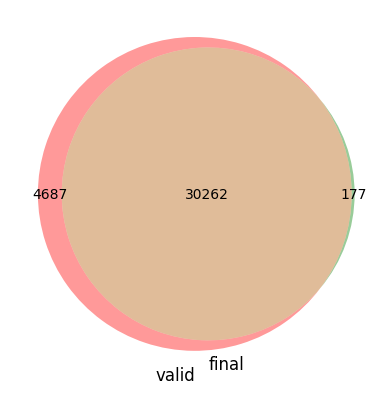

In [86]:
# create venn
import matplotlib_venn as venn
import matplotlib.pyplot as plt

venn.venn2(subsets = (set(valid_result_df['target'].unique()), set(probing_df['phrase'].unique())), set_labels = ('valid', 'final'))

In [19]:
from Levenshtein import distance as Lev_distance
def calculate_N_D(s1, s2):
    l = len(s1)
    lvd = Lev_distance(s1, s2)
    return lvd, l
    
global_N, global_D = 0, 0
for target_strings, predict_strings in valid_result_fold0_df[['target', 'pred_epoch5']].values:
    values = [calculate_N_D(target, predict) for target, predict in zip(target_strings, predict_strings)]
    global_D += np.sum([x[0] for x in values])
    global_N += np.sum([x[1] for x in values])

metric_value = np.clip((global_N - global_D) / global_N, a_min=0, a_max=1)

In [20]:
metric_value

0.3669542313243716

In [21]:
valid_result_fold0_df

,target,pred_epoch0,pred_epoch1,pred_epoch2,pred_epoch3,pred_epoch4,pred_epoch5,pred_epoch6,pred_epoch7,pred_epoch8,...,pred_epoch10,pred_epoch11,pred_epoch12,pred_epoch13,pred_epoch14,pred_epoch15,pred_epoch16,pred_epoch17,pred_epoch18,pred_epoch19
0,gladys guzman,,adysa,gadysga,gadisa,adisa,gadysga,gadisan,gadysa,adyszan,...,gadysan,gadysgan,gadys gzan,gadyszan,gadys gzan,gadys qgzan,gadys qgzan,gadys gan,gadys gan,gadys gzan
1,8780 old 13th,,8780l3,8780ld3,878ld3 h,8783,8783h,878l3h,878d3h,8780 l 3h,...,8780ol d 3h,8780 ol 3h,8780 old 3h,8780 old 3h,8780 old 3h,8780 ol d 3h,8780 old 3h,8780 old 3h,8780 old 3h,8780 old 3h
2,www.china-ycyb.com/arduinoprof,,w.ciycbom/rdiopo,ww.miycibcom/oarduiopuro,w.i.ycbcom/arduinopro,w.ci-ycbcom/arduinopro,w.chiycbcm/aruiopro,w.ci-ycbcm/arduinopro,ww.chi-ycbom/arduinopro,.chi-ycb.om/arduinopro,...,ww.ci-ycbcom/arduinopro,www.i-ycbom/sarduinopro,ww.chi-ycb.com/arduinopro,ww.cmi-ycb.com/arduinopro,www.ci-ycyb.com/arduinopro,www.cmi-ycb.com/arduinopro,ww.ci-ycb.com/arduinopro,www.ci-ycb.com/arduinopro,www.cia-ycb.com/arduinopro,www.cia-ycb.com/arduinopro
3,7642 south beulah road,,7642sorthbberlahro,764 2southbeulahro,7642 esorthbbeulahrod,7642 sorth berlahro,7642 sorth berlh ro,7642 sorth beulho,7642 sourth berlhrod,7642 sorth beulah rod,...,7642 south beulah rod,7642 south beulh rod,7642 south beulh road,7642 south beulah rod,7642 south beulth road,7642 south beulh road,7642 south beulah road,7642 south beulah road,7642 south beulah road,7642 south beulah road
4,+682-45-4328-458,+,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-58,+682-45-4328-458,+682-45-4328-458,...,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,7868 co road 3487,,78600348,7586001347,7758680roa48,57868ro348,786580roa348,78680r013487,78600a347,7868 0roa34,...,57868 co road 34,5786 oroa348,578658 co road 34,57868 co road 3488,7868 co road 348,5786 co road 348,786 co road 348,7868 co road 348,7868 co road 348,7868 co road 348
11285,kathleen peralta,,athlenperalta,athlenperalta,kathlen peralta,athlenperalta,athlen peralta,kathlenperalta,kathlenperalta,kathlen peralta,...,athlen peralta,kathlenperalta,pathlen peralta,kathlenperalta,kathlen peralta,kathlen peralta,kathlen peralta,kathlen peralta,kathlen peralta,kathlen peralta
11286,custo-de-vida,,cuatoeida,custo-de-vida,crsto-de-2ida,crsto-de-vida,crst-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,...,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida
11287,alexis good,,ecod,leisod,lexiood,exisco,id,leicood,leood,lxcood,...,leood,alexisood,lexiood,lexisood,lexis ood,lexisood,lexisood,lexis good,lexisood,lexis ood


In [22]:
oof_0_df

,sequence_id,phrase,pred,score,fold
0,1494438637,gladys guzman,gadys gzan,0.769231,0
1,1494454903,8780 old 13th,8780 old 3h,0.846154,0
2,1494472407,+62-879-37-82,,0.000000,0
3,1494503729,www.china-ycyb.com/arduinoprof,www.cia-ycb.com/arduinopro,0.866667,0
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0
...,...,...,...,...,...
16995,1975215809,409 locust place north,ce na,0.227273,0
16996,1975251416,custo-de-vida,custo-de-vida,1.000000,0
16997,1975337682,alexis good,lexis ood,0.818182,0
16998,1975349526,7617 west winchester court,7617 west winchester court,1.000000,0


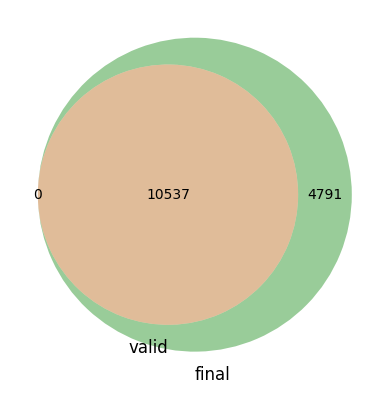

In [23]:
# create venn
import matplotlib_venn as venn
import matplotlib.pyplot as plt

venn.venn2(subsets = (set(valid_result_fold0_df['target'].unique()), set(oof_0_df['phrase'].unique())), set_labels = ('valid', 'final'))
# set(valid_result_fold0_df['target'].unique())

In [30]:
# delete_data = set(oof_0_df['phrase'].unique()) - set(valid_result_fold0_df['target'].unique())
delete_data = set(valid_result_fold0_df['target'].unique())
oof_del_df = oof_0_df.query('phrase in @delete_data')

<Axes: >

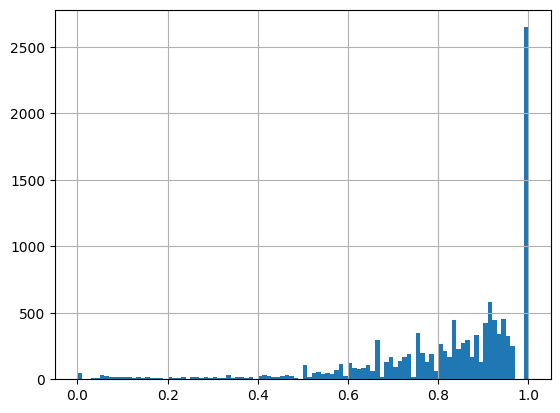

In [31]:
oof_del_df['score'].hist(bins=100)

In [32]:
oof_del_df.query('score < 0.67')

,sequence_id,phrase,pred,score,fold
10,1494697058,9007 north madera mesa place,600nrth madra meape,0.642857,0
20,1495414996,5010 southton,coloso,0.153846,0
21,1495417566,4286 boring court,46 bo inpcou,0.588235,0
34,1495810555,https://microproducers.com/,m,0.037037,0
37,1495988069,+45-541-213-1094-241,+454-23-0942,0.600000,0
...,...,...,...,...,...
16950,1973269315,9993 west girard street,993 sr eatree,0.478261,0
16953,1973438931,https://colaistelorcain.com,http:/waistwcae,0.444444,0
16979,1974546566,611 homoja,6 homjla,0.600000,0
16980,1974580696,www.spielzeug.world/love-2015,www.spiidek/,0.310345,0


In [33]:
oof_del_df

,sequence_id,phrase,pred,score,fold
0,1494438637,gladys guzman,gadys gzan,0.769231,0
1,1494454903,8780 old 13th,8780 old 3h,0.846154,0
3,1494503729,www.china-ycyb.com/arduinoprof,www.cia-ycb.com/arduinopro,0.866667,0
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0
5,1494527553,+682-45-4328-458,+682-45-4328-458,1.000000,0
...,...,...,...,...,...
16993,1975144364,kathleen peralta,kathlen peralta,0.937500,0
16996,1975251416,custo-de-vida,custo-de-vida,1.000000,0
16997,1975337682,alexis good,lexis ood,0.818182,0
16998,1975349526,7617 west winchester court,7617 west winchester court,1.000000,0


In [140]:
import json
with open('/Users/nakagawaayato/compe/kaggle/asl2/data/original_data/character_to_prediction_index.json', 'r') as f:
    char2num = json.load(f)

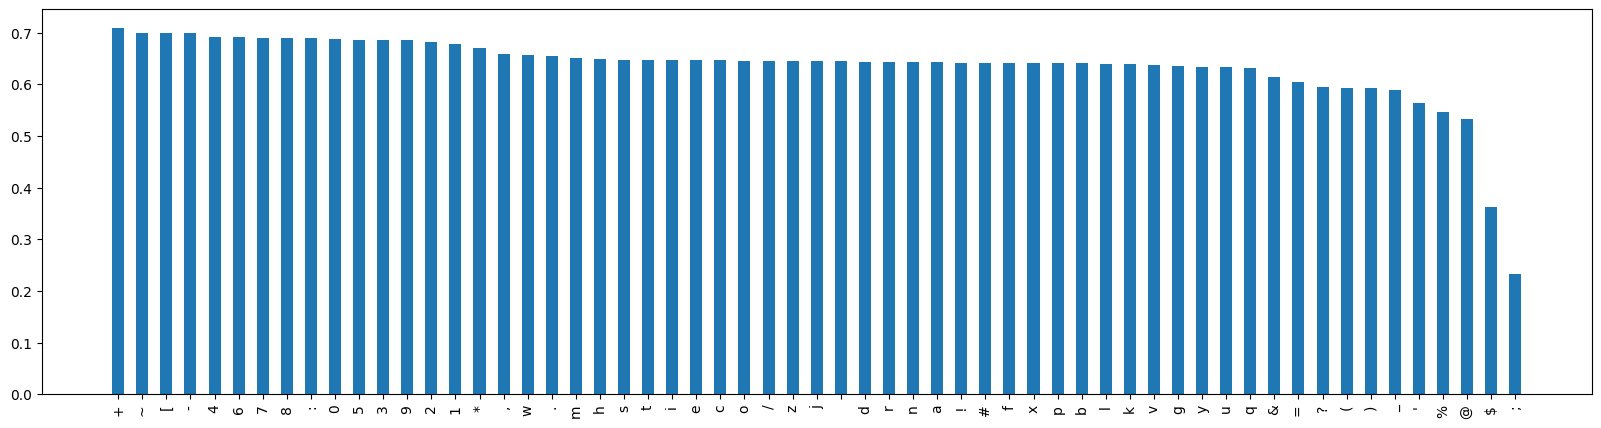

In [182]:
char_oof_df = oof_df[['sequence_id', 'phrase', 'pred', 'score']]
char_columns = [f'column_{i}' for i in range(len(char2num))]
char_oof_df.loc[:, char_columns] = 0
char_oof_df
from collections import Counter
from tqdm.notebook import tqdm
tqdm.pandas()
def f(x):
    char_count = Counter(list(x))
    count_list = [char_count[char] if char in char_count else 0 for char in char2num.keys()]
    return count_list

char_oof_df.iloc[:, 4:] = char_oof_df.apply(lambda x:f(x['phrase']), axis=1, result_type='expand')
char_oof_df.loc[:, char_columns] = char_oof_df[char_columns].astype(int)
char_df = pd.DataFrame(columns=['char', 'score_mean', 'score_count'])
char_df['char'] = char2num.keys()
for char, char_id in char2num.items():
    char_df.loc[char_id, 'score_mean'] = (char_oof_df[f'column_{char_id}'] * char_oof_df['score']).sum() / char_oof_df[f'column_{char_id}'].sum()
    # char_df.loc[char_id, 'score_std'] = char_oof_df[f'column_{char_id}'].std()
    char_df.loc[char_id, 'score_count'] = char_oof_df[f'column_{char_id}'].sum()
    # print(f'{char}: {score_sum / score_count:.4f}, count: {score_count}')

# plot
plt.figure(figsize=(20, 5))
# sort
char_df = char_df.sort_values('score_mean', ascending=False)
plt.bar(char_df['char'], char_df['score_mean'], width=0.5)
plt.xticks(rotation=90)
plt.show()

In [180]:
probing_df    

,sequence_id,phrase,pred,score,fold,len_phrase,len_pred,file_id,n_frames,dominant_hand,n_frames_hand,limit_pred,pred_clip
0,1494438637,gladys guzman,gadys gzan,0.769231,0,13,10,296317215,107,right,53,17,gadys gzan
1,1494454903,8780 old 13th,8780 old 3h,0.846154,0,13,11,296317215,98,right,47,15,8780 old 3h
3,1494503729,www.china-ycyb.com/arduinoprof,www.cia-ycb.com/arduinopro,0.866667,0,30,26,296317215,241,left,191,63,www.cia-ycb.com/arduinopro
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0,22,22,296317215,133,right,108,36,7642 south beulah road
5,1494527553,+682-45-4328-458,+682-45-4328-458,1.000000,0,16,16,296317215,148,right,127,42,+682-45-4328-458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67280,1399581936,+420-43-50-6565-6964-06,+420-43-50-6565-696406,0.956522,3,23,22,2036580525,259,right,259,86,+420-43-50-6565-696406
67281,1399619808,clearpasteglaze,learpaasteglaze,0.866667,3,15,15,2036580525,237,left,158,52,learpaasteglaze
67282,1399691845,www.kmi-foods.nl/week,wwkmi-fod.nl/week,0.809524,3,21,17,2036580525,130,left,75,25,wwkmi-fod.nl/week
67284,1399701872,anthropology/1the9fanart,anthropology/1hefanar,0.875000,3,24,21,2036580525,235,right,213,71,anthropology/1hefanar


/var/folders/s8/kn1s0g_s407d23sqsmvzcql80000gn/T/ipykernel_87039/1360633628.py:18: RuntimeWarning: invalid value encountered in scalar divide
  char_df.loc[char_id, 'score_mean'] = (char_oof_df[f'column_{char_id}'] * char_oof_df['score']).sum() / char_oof_df[f'column_{char_id}'].sum()


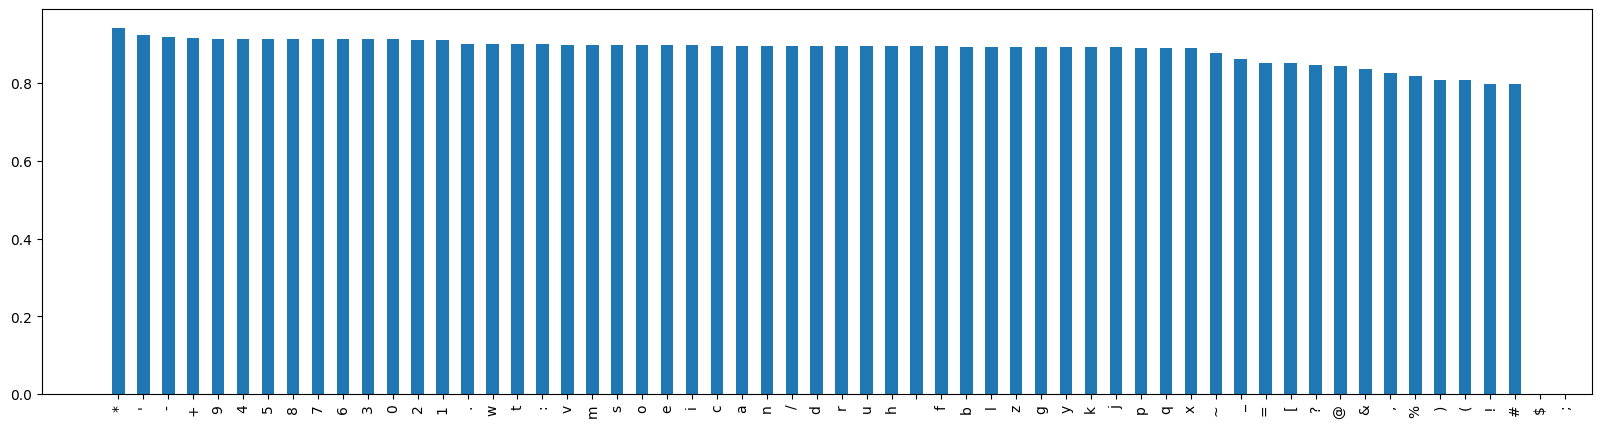

In [185]:
char_oof_df = probing_df[['sequence_id', 'phrase', 'pred', 'score']]
char_columns = [f'column_{i}' for i in range(len(char2num))]
char_oof_df.loc[:, char_columns] = 0
char_oof_df
from collections import Counter
from tqdm.notebook import tqdm
tqdm.pandas()
def f(x):
    char_count = Counter(list(x))
    count_list = [char_count[char] if char in char_count else 0 for char in char2num.keys()]
    return count_list

char_oof_df.iloc[:, 4:] = char_oof_df.apply(lambda x:f(x['phrase']), axis=1, result_type='expand')
char_oof_df.loc[:, char_columns] = char_oof_df[char_columns].astype(int)
char_df = pd.DataFrame(columns=['char', 'score_mean', 'score_count'])
char_df['char'] = char2num.keys()
for char, char_id in char2num.items():
    char_df.loc[char_id, 'score_mean'] = (char_oof_df[f'column_{char_id}'] * char_oof_df['score']).sum() / char_oof_df[f'column_{char_id}'].sum()
    # char_df.loc[char_id, 'score_std'] = char_oof_df[f'column_{char_id}'].std()
    char_df.loc[char_id, 'score_count'] = char_oof_df[f'column_{char_id}'].sum()
    # print(f'{char}: {score_sum / score_count:.4f}, count: {score_count}')

# plot
plt.figure(figsize=(20, 5))
# sort
char_df = char_df.sort_values('score_mean', ascending=False)
plt.bar(char_df['char'], char_df['score_mean'], width=0.5)
plt.xticks(rotation=90)
plt.show()

In [186]:
char_df

,char,score_mean,score_count
9,*,0.941176,1
6,',0.923077,1
12,-,0.916662,32770
10,+,0.915528,5233
24,9,0.913364,17222
19,4,0.913318,17825
20,5,0.912931,17446
23,8,0.912851,16726
22,7,0.91274,16682
21,6,0.911756,17729
